# <span style="color:darkblue"> Lecture 22 - Subsetting and Pivoting  </span>

<font size = "5">


<font size = "5">

In the previous class ...

- ... we introduced parsing and
- ... data manipulation with time

In this class we will ...

- Plot multiple series
- Compute growth rates
- Use merge/pivot to change layout of data

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Import libraries

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

Import data

In [2]:
financial      = pd.read_csv("data_raw/financial.csv")

<font size = "5">

Parse data and sort dataset

In [3]:
financial["date"] = pd.to_datetime(financial["date_str"])
financial         = financial.sort_values("date",ascending = True)

<font size = "5">

Plot multiple columns

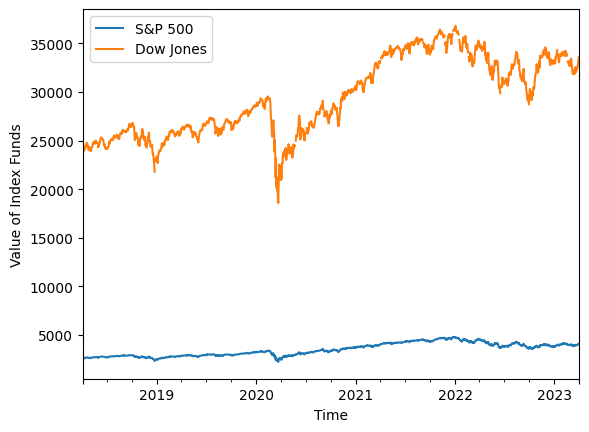

In [4]:
# Enter the x-axis column and y-axis columns you 
# wish to include. Specify the x-axis column with "set_index()"
# This applies to any line plot, with or without dates
# The legend is the box with the name of the lines
# If you drop the ".legend()" command this will assign
# the default column names to the legend.


financial[["date","sp500","djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])


<font size = "5">

Remarks ...

- The S\&P 500 and Dow Jones have different units.
- More sensibile to compare their growth rate!


# <span style="color:darkblue"> II. Time Difference/Growth </span>

<font size = "5">

Change between periods

In [5]:
# First sort columns by date. The second computes the
# differences in "sp500" between each row and the one before it
# By convention, the first row gets a missing value because
# there is nothing to compare. For this to work, it's important
# that the dataset is sorted.

financial["diff_sp500"] = financial["sp500"].diff()

display(financial[["sp500","diff_sp500"]])

# first is for subsetting and the second is a list

,sp500,diff_sp500
0,2644.69,NaN
1,2662.84,18.15
2,2604.47,-58.37
3,2613.16,8.69
4,2656.87,43.71
...,...,...
1300,4027.81,56.54
1301,4050.83,23.02
1302,4109.31,58.48
1303,4124.51,15.20


<font size = "5">

Compute lag + percentage growth

In [6]:
# ".shif(1)" compute a new column with the value of "sp500"
# one period before. By convention the first column is assigned
# a missing value
# We can combine ".diff()" and ".shift()" to compute growth rates

financial["lag_sp500"]    = financial["sp500"].shift(1)

display(financial[["sp500","lag_sp500"]])


financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]

display(financial[["sp500","diff_sp500","lag_sp500"]])


,sp500,lag_sp500
0,2644.69,NaN
1,2662.84,2644.69
2,2604.47,2662.84
3,2613.16,2604.47
4,2656.87,2613.16
...,...,...
1300,4027.81,3971.27
1301,4050.83,4027.81
1302,4109.31,4050.83
1303,4124.51,4109.31


,sp500,diff_sp500,lag_sp500
0,2644.69,NaN,NaN
1,2662.84,18.15,2644.69
2,2604.47,-58.37,2662.84
3,2613.16,8.69,2604.47
4,2656.87,43.71,2613.16
...,...,...,...
1300,4027.81,56.54,3971.27
1301,4050.83,23.02,4027.81
1302,4109.31,58.48,4050.83
1303,4124.51,15.20,4109.31


<font size = "5">

Time between dates

In [7]:
# In the financial data example, the price of the stock portfolios isn't recorded
# on weekends. Sometimes it's important to account for these differences in the
# legnth between time periods, when accounting for growth rates
# Can compute dt.days, dt.months, dt.year, etc.

financial["diff_date"]  = financial["date"]-financial["date"].shift(1)  # same as diff
financial["count_days"] = financial["diff_date"].dt.days  # how many days there are in the corresponding time period

<font size = "5">

Plot growth

Text(0.5, 1.0, 'Change in the S&P 500 Index')

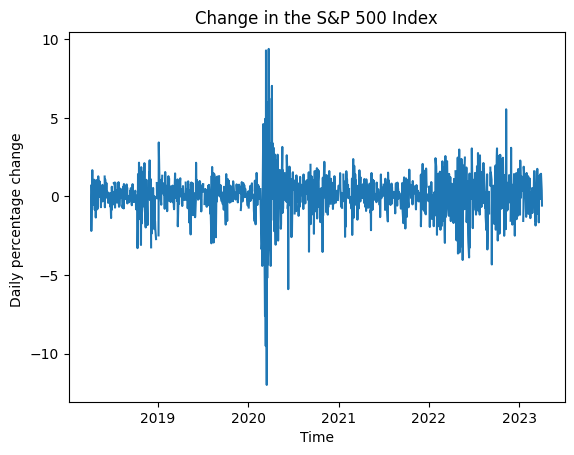

In [8]:
plt.plot("date", "growth_sp500",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the S&P 500 Index")

<font size = "5" >

Try it yourself!

- Compute a column with the growth of the Dow Jones
- Plot the growth of the S&P 500 and Dow Jones in a <br>
single plot

Text(0.5, 1.0, 'Change in the S&P 500 Index')

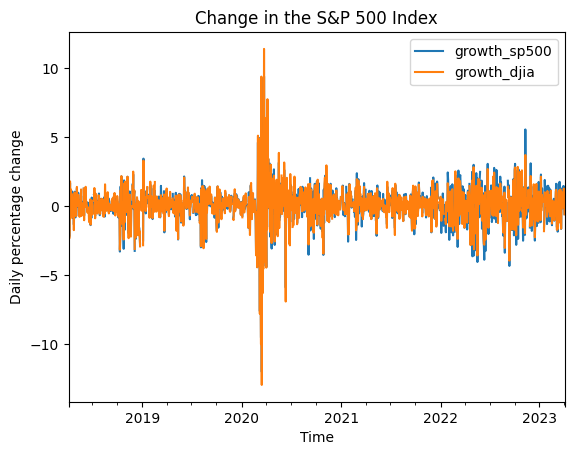

In [13]:
financial["diff_djia"] = financial["djia"].diff()
financial["lag_djia"]    = financial["djia"].shift(1)
financial["growth_djia"] = financial["diff_djia"]* 100/financial["lag_djia"]

financial[["date","growth_sp500","growth_djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Daily percentage change")
plt.title("Change in the S&P 500 Index")


,djia,diff_djia,lag_djia
0,24264.30,NaN,NaN
1,24505.22,240.92,24264.30
2,23932.76,-572.46,24505.22
3,23979.10,46.34,23932.76
4,24408.00,428.90,23979.10
...,...,...,...
1300,32717.60,323.35,32394.25
1301,32859.03,141.43,32717.60
1302,33274.15,415.12,32859.03
1303,33601.15,327.00,33274.15


Text(0.5, 1.0, 'Change in the S&P 500 and Dow Jones Index')

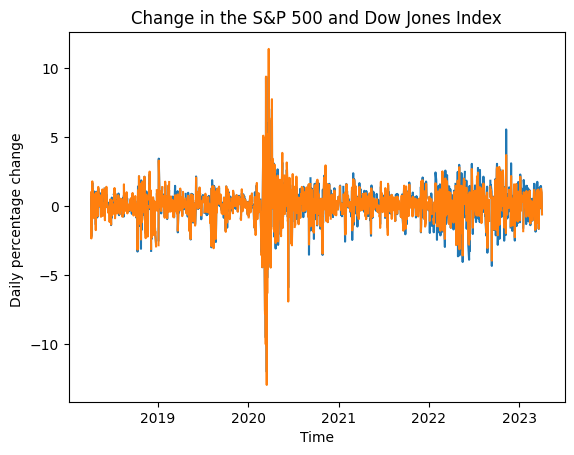

In [ ]:
# Write your own code

financial["diff_djia"] = financial["djia"].diff()
financial["lag_djia"]    = financial["djia"].shift(1)
financial["growth_djia"] = financial["diff_djia"]* 100/financial["lag_djia"]
display(financial[["djia","diff_djia","lag_djia"]])

plt.plot("date", "growth_sp500", 
          data = financial.sort_values("date",ascending = True))
plt.plot("date","growth_djia",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the S&P 500 and Dow Jones Index")
#???

# <span style="color:darkblue"> III. Subsetting with time data </span>

<font size = "5" >

Subsetting before/after

In [ ]:
# Since the "date" column has a time format, Python
# will interpret "2019-01-01" as a date inside the query command
# Note: remember that you have to use single quotations for ".query()"

subset_before  = financial.query('date >= "2019-01-01" ')
subset_after   = financial.query('date <= "2020-01-01" ')

<font size = "5" >

Obtain a subset before/after

In [ ]:
# This command applies the function ".between()" to the column

subset_between = financial.query('date.between("2020-03-01","2020-05-01")')

<font size = "5">

Flag observations

In [ ]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5 #number of weekdays


<font size = "5">

Plot results

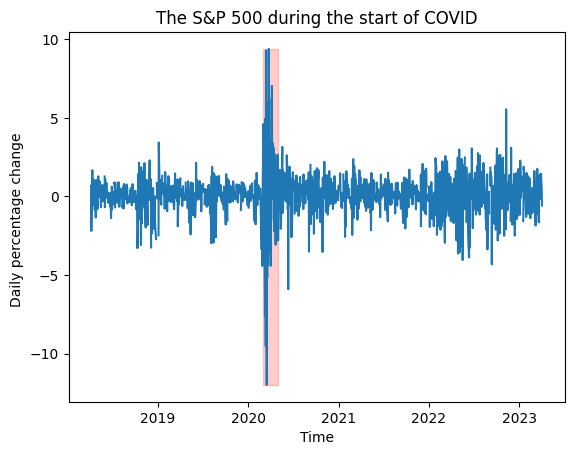

In [ ]:
# Create a line plot
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

<font size = "5">

Try it yourself!

- Generate a plot of the daily growth of the Dow Jones 
- Highlight regions where there was growth higher than 4\% <br>
or below -4\%

In [ ]:
# Write your own code





# <span style="color:darkblue"> IV. Wide and Long Format </span>

<font size = "5">

Data can come in a wide variety of formats

- Few rows, multiple columns (wide)
- Stacked rows, few columns (long)
- The **information** is the same!

<font size = "5">

Wide to long

$\quad$ <img src="figures/melt_fig.png" alt="drawing" width="550"/>

In [ ]:
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type", # aesthetic
                         value_name = "portfolio_value", #aesthetic
                         id_vars='date',
                         value_vars=['sp500','djia'])
#turning wide to long

<font size = "5">

Long to wide

$\quad$ <img src="figures/pivot_fig.png" alt="drawing" width="550"/>

In [ ]:
financial_wide = (pd.pivot(financial_long,
                           index = 'date',
                           columns = 'portfolio_type',
                           values =  'portfolio_value'))
#turning long to wide
# If you also want the index to be part of the dataset add
# ".reset_index()" to the end of the previous command

<font size = "5">

Try it yourself!

- Convert the "growth_sp500" and <br>
"growth_djia" to long format

In [ ]:
# Write your own code

financial_long2=pd.melt(financial,
                     var_name="var_name",
                     value_name = "value_name",
                     id_vars="date",
                     value_vars=['growth_sp500','growth_djia'])
display(financial_long2)


,date,var_name,value_name
0,2018-04-04,growth_sp500,NaN
1,2018-04-05,growth_sp500,0.686281
2,2018-04-06,growth_sp500,-2.192021
3,2018-04-09,growth_sp500,0.333657
4,2018-04-10,growth_sp500,1.672687
...,...,...,...
2605,2023-03-29,growth_djia,0.998171
2606,2023-03-30,growth_djia,0.432275
2607,2023-03-31,growth_djia,1.263336
2608,2023-04-03,growth_djia,0.982745
